# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En este proyecto revisaremos la información proporcionada por Megalien para sabes cual de sus dos planes genera mayores ingresos para la compañia. 

Para iniciar el proyecto se cargarán las libres necesarias para poder procesar los datos, se hara un análisis de la información proporcionada para corregir datos y después se hara el análisis cualitativo y cuantitativo para encontrar la respuesta que solicita la empresa.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
ml_users = pd.read_csv('/datasets/megaline_users.csv')
ml_plans = pd.read_csv('/datasets/megaline_plans.csv')
ml_calls = pd.read_csv('/datasets/megaline_calls.csv')
ml_internet = pd.read_csv('/datasets/megaline_internet.csv')
ml_messages = pd.read_csv('/datasets/megaline_messages.csv')

## Preparar los datos

Todas las tablas proporcionadas por Megaline tiene información valiosa para poder hacer los analisis y revisar cual de las dos tarifas generan mayores ingresos para la compañia.
Antes de poder hacer el analisis para determinar eso, será necesario revisar a detalle toda la información proporcionada a detalle y prepararla para evitar cualquier error.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
ml_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
ml_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Con esta información sabemos que la oferta comercial de los paquetes de prepago de Megaline son dos: Surf y Ultimate.
Para poder ver cual de estos dos paquetes genera mayor ingreso, necesitamos revisar la demás información.

## Corregir datos

In [5]:
print(ml_plans.duplicated().sum())
print()
print(ml_plans.isna().sum())

0

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


## Enriquecer los datos

In [6]:
plans = ml_plans
plans['gd_per_month_included'] = plans['mb_per_month_included']/1024
gb_per_month = plans.pop('gd_per_month_included')
plans.insert(2,'gd_per_month_included', gb_per_month)
plans

,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20,10,0.03,0.03,surf
1,1000,30720,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
ml_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
ml_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


En la tabla de de los clientes vemos que tenemos información faltante y algunos datos que para este estudio en particular no necesitamos, como la edad o el nombre. Les daremos formato a esta tabla para poder continuar con el analisis de la información.

### Corregir los datos

In [9]:
print(ml_users.isna().sum())
print()
print(ml_users['churn_date'].isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

466


### Enriquecer los datos

In [10]:
ml_users['churn_date'] = ml_users['churn_date'].fillna('Active')
ml_users = ml_users.rename(columns={'plan':'plan_name'})
print(ml_users.isna().sum())
print()
print(ml_users['churn_date'].isna().sum())
ml_users.head(5)

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan_name     0
churn_date    0
dtype: int64

0


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active


In [11]:
ml_users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Cape Coral-Fort Myers, FL MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Greensboro-High Point, NC MSA                       1
El Paso, TX MSA                                     1
Jacksonville, FL MSA                                1
Name: city, Length: 73, dtype: int64

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
ml_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
ml_calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


En esta tabla podemos encontrar la información de las llamadas hechas por cada usuario. Dentro de esta tabla tenemos datos muy importantes para poder hacer el analisis que nos solicitó Megaline, sin embargo se pueden observar algunos detalles que se tienen que correguir; para poder agrupar las llamadas hechas por cada usuario en un mes se tiene que cambiar el formato de la fecha y también se tienen que redondear las duraciones de las llamadas ya que no se tienen contemplada tarifa por segundo sino minutos completos. 

### Corregir los datos

In [14]:
print(ml_calls.isna().sum())
ml_calls['call_date'] = pd.to_datetime(ml_calls['call_date'], format='%Y-%m-%d')
ml_calls

id           0
user_id      0
call_date    0
duration     0
dtype: int64


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Enriquecer los datos

In [15]:
ml_calls['month']= ml_calls['call_date'].dt.month
ml_calls_users= ml_calls.groupby(['user_id','month'])['duration'].sum().reset_index()
print(ml_calls_users)
ml_calls_users_round = ml_calls_users
ml_calls_users_round['duration'] = np.ceil(ml_calls_users_round['duration']).astype(int)
ml_calls_users_round.columns = ['user_id','month','calls_duration']
ml_calls_users_round

      user_id  month  duration
0        1000     12    116.83
1        1001      8    171.14
2        1001      9    297.69
3        1001     10    374.11
4        1001     11    404.59
...       ...    ...       ...
2253     1498     12    324.77
2254     1499      9    330.37
2255     1499     10    363.28
2256     1499     11    288.56
2257     1499     12    468.10

[2258 rows x 3 columns]


,user_id,month,calls_duration
0,1000,12,117
1,1001,8,172
2,1001,9,298
3,1001,10,375
4,1001,11,405
...,...,...,...
2253,1498,12,325
2254,1499,9,331
2255,1499,10,364
2256,1499,11,289


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
ml_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
ml_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Esta tabla tambien sera importante para hacer el analisis que nos solicitó el cliente, como en la tabla anterior, se tiene que cambiar el formato de la fecha para contar los mensajes mandados por cada usuario. 

### Corregir los datos

In [18]:
print(ml_messages.duplicated().sum())
ml_messages['message_date'] = pd.to_datetime(ml_messages['message_date'], format='%Y-%m-%d')
ml_messages

0


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enriquecer los datos

In [19]:
ml_messages['month']= ml_messages['message_date'].dt.month
ml_messages_users = ml_messages.groupby(['user_id','month']).count().reset_index()
del ml_messages_users['id']
ml_messages_users.columns = ['user_id','month','number_of_messages']
ml_messages_users

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
ml_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
ml_internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


En esta tabla de Megaline tenemos la información de los datos consumidos por los clienets, como en los casos anteriores, se tiene que formatear la fecha para poder agrupar la información y sumar los datos de cada usuario.

### Corregir los datos

In [22]:
print(ml_internet.duplicated().sum())
ml_internet['session_date'] = pd.to_datetime(ml_internet['session_date'], format='%Y-%m-%d')
ml_internet

0


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enriquecer los datos

In [23]:
ml_internet['month']= ml_internet['session_date'].dt.month
ml_internet_users = ml_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
ml_internet_users
ml_internet_users['gb_used'] = ml_internet_users['mb_used']/1024
ml_internet_users

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,1.856904
1,1001,8,6919.15,6.756982
2,1001,9,13314.82,13.002754
3,1001,10,22330.49,21.807119
4,1001,11,18504.30,18.070605
...,...,...,...,...
2272,1498,12,23137.69,22.595400
2273,1499,9,12984.76,12.680430
2274,1499,10,19492.43,19.035576
2275,1499,11,16813.83,16.419756


## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
ml_plans['gd_per_month_included'] = ml_plans['mb_per_month_included']/1024
gb_per_month = ml_plans.pop('gd_per_month_included')
ml_plans.insert(2,'gd_per_month_included', gb_per_month)
ml_plans

,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20,10,0.03,0.03,surf
1,1000,30720,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
ml_calls_totals= ml_calls.groupby(['user_id','month']).count().reset_index()
del ml_calls_totals['id']
del ml_calls_totals['call_date']
ml_calls_totals.columns = ['user_id','month','calls_number']
ml_calls_totals

,user_id,month,calls_number
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
ml_calls_users_round

,user_id,month,calls_duration
0,1000,12,117
1,1001,8,172
2,1001,9,298
3,1001,10,375
4,1001,11,405
...,...,...,...
2253,1498,12,325
2254,1499,9,331
2255,1499,10,364
2256,1499,11,289


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
ml_messages_users

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
ml_internet_users

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,1.856904
1,1001,8,6919.15,6.756982
2,1001,9,13314.82,13.002754
3,1001,10,22330.49,21.807119
4,1001,11,18504.30,18.070605
...,...,...,...,...
2272,1498,12,23137.69,22.595400
2273,1499,9,12984.76,12.680430
2274,1499,10,19492.43,19.035576
2275,1499,11,16813.83,16.419756


In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
ml = pd.merge(ml_calls_totals, ml_calls_users_round, on=['user_id','month'], how = 'left')
ml_pre = ml.merge(ml_messages_users, on=['user_id','month'], how = 'left')
ml_data = ml_pre.merge(ml_internet_users, on=['user_id','month'], how = 'left')
ml_data['calls_number'] = ml_data['calls_number'].fillna(0)
ml_data['calls_duration'] = ml_data['calls_duration'].fillna(0)
ml_data['number_of_messages'] = ml_data['number_of_messages'].fillna(0)
ml_data['mb_used'] = ml_data['mb_used'].fillna(0)
ml_data['gb_used'] = ml_data['gb_used'].fillna(0)
ml_data


,user_id,month,calls_number,calls_duration,number_of_messages,mb_used,gb_used
0,1000,12,16,117,11.0,1901.47,1.856904
1,1001,8,27,172,30.0,6919.15,6.756982
2,1001,9,49,298,44.0,13314.82,13.002754
3,1001,10,65,375,53.0,22330.49,21.807119
4,1001,11,64,405,36.0,18504.30,18.070605
...,...,...,...,...,...,...,...
2253,1498,12,39,325,0.0,23137.69,22.595400
2254,1499,9,41,331,0.0,12984.76,12.680430
2255,1499,10,53,364,0.0,19492.43,19.035576
2256,1499,11,45,289,0.0,16813.83,16.419756


In [30]:
# Añade la información de la tarifa
ml_user_plans = ml_users.drop(columns = ['first_name', 'last_name', 'age', 'city', 'reg_date','churn_date'], axis=1, inplace=False)
ml_data_users = ml_data.merge(ml_user_plans, on='user_id', how = 'left')
ml_data_users

,user_id,month,calls_number,calls_duration,number_of_messages,mb_used,gb_used,plan_name
0,1000,12,16,117,11.0,1901.47,1.856904,ultimate
1,1001,8,27,172,30.0,6919.15,6.756982,surf
2,1001,9,49,298,44.0,13314.82,13.002754,surf
3,1001,10,65,375,53.0,22330.49,21.807119,surf
4,1001,11,64,405,36.0,18504.30,18.070605,surf
...,...,...,...,...,...,...,...,...
2253,1498,12,39,325,0.0,23137.69,22.595400,surf
2254,1499,9,41,331,0.0,12984.76,12.680430,surf
2255,1499,10,53,364,0.0,19492.43,19.035576,surf
2256,1499,11,45,289,0.0,16813.83,16.419756,surf


In [31]:
ml_plans

,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20,10,0.03,0.03,surf
1,1000,30720,30.0,3000,70,7,0.01,0.01,ultimate


In [32]:
# Calcula el ingreso mensual para cada usuario
#ml_data_users['minutes_included'] = ml_data_users
ml_data_complete = ml_data_users.merge(ml_plans, on='plan_name', how = 'outer')
ml_data_complete.sort_values(by='user_id', ascending=True, inplace=True)
ml_data_complete

,user_id,month,calls_number,calls_duration,number_of_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,117,11.0,1901.47,1.856904,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01
715,1001,10,65,375,53.0,22330.49,21.807119,surf,50,15360,15.0,500,20,10,0.03,0.03
716,1001,11,64,405,36.0,18504.30,18.070605,surf,50,15360,15.0,500,20,10,0.03,0.03
717,1001,12,56,393,44.0,19369.18,18.915215,surf,50,15360,15.0,500,20,10,0.03,0.03
714,1001,9,49,298,44.0,13314.82,13.002754,surf,50,15360,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,39,325,0.0,23137.69,22.595400,surf,50,15360,15.0,500,20,10,0.03,0.03
2255,1499,10,53,364,0.0,19492.43,19.035576,surf,50,15360,15.0,500,20,10,0.03,0.03
2256,1499,11,45,289,0.0,16813.83,16.419756,surf,50,15360,15.0,500,20,10,0.03,0.03
2254,1499,9,41,331,0.0,12984.76,12.680430,surf,50,15360,15.0,500,20,10,0.03,0.03


In [33]:
ml_data_calculated = ml_data_complete.copy()
ml_data_calculated['calls_chargeable'] = ml_data_calculated['calls_duration'] - ml_data_calculated['minutes_included']
ml_data_calculated['calls_chargeable'] =ml_data_calculated['calls_chargeable'].clip(lower=0)
ml_data_calculated['messages_chargeable'] = ml_data_calculated['number_of_messages'] - ml_data_calculated['messages_included']
ml_data_calculated['messages_chargeable'] =ml_data_calculated['messages_chargeable'].clip(lower=0)
ml_data_calculated['gb_chargeable'] = ml_data_calculated['gb_used'] - ml_data_calculated['gd_per_month_included']
ml_data_calculated['gb_chargeable'] = ml_data_calculated['gb_chargeable'].clip(lower=0)
ml_data_calculated['gb_chargeable'] = np.ceil(ml_data_calculated['gb_chargeable'])
ml_data_calculated

,user_id,month,calls_number,calls_duration,number_of_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_chargeable,messages_chargeable,gb_chargeable
0,1000,12,16,117,11.0,1901.47,1.856904,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01,0,0.0,0.0
715,1001,10,65,375,53.0,22330.49,21.807119,surf,50,15360,15.0,500,20,10,0.03,0.03,0,3.0,7.0
716,1001,11,64,405,36.0,18504.30,18.070605,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,4.0
717,1001,12,56,393,44.0,19369.18,18.915215,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,4.0
714,1001,9,49,298,44.0,13314.82,13.002754,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,39,325,0.0,23137.69,22.595400,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,8.0
2255,1499,10,53,364,0.0,19492.43,19.035576,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,5.0
2256,1499,11,45,289,0.0,16813.83,16.419756,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,2.0
2254,1499,9,41,331,0.0,12984.76,12.680430,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,0.0


In [34]:
def revenue_calc(row):
    calls = row['calls_chargeable']* row['usd_per_minute']
    sms = row['messages_chargeable']* row['usd_per_message']
    gb = row['gb_chargeable']* row['usd_per_gb']
    row['total_revenue'] = row['usd_monthly_pay'] + calls + sms + gb 
    
    return row

In [35]:
ml_data_calculated = ml_data_calculated.apply(revenue_calc, axis = 1)
ml_data_calculated

,user_id,month,calls_number,calls_duration,number_of_messages,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,gd_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_chargeable,messages_chargeable,gb_chargeable,total_revenue
0,1000,12,16,117,11.0,1901.47,1.856904,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01,0,0.0,0.0,70.00
715,1001,10,65,375,53.0,22330.49,21.807119,surf,50,15360,15.0,500,20,10,0.03,0.03,0,3.0,7.0,90.09
716,1001,11,64,405,36.0,18504.30,18.070605,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,4.0,60.00
717,1001,12,56,393,44.0,19369.18,18.915215,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,4.0,60.00
714,1001,9,49,298,44.0,13314.82,13.002754,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,39,325,0.0,23137.69,22.595400,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,8.0,100.00
2255,1499,10,53,364,0.0,19492.43,19.035576,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,5.0,70.00
2256,1499,11,45,289,0.0,16813.83,16.419756,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,2.0,40.00
2254,1499,9,41,331,0.0,12984.76,12.680430,surf,50,15360,15.0,500,20,10,0.03,0.03,0,0.0,0.0,20.00


## Estudia el comportamiento de usuario

### Llamadas

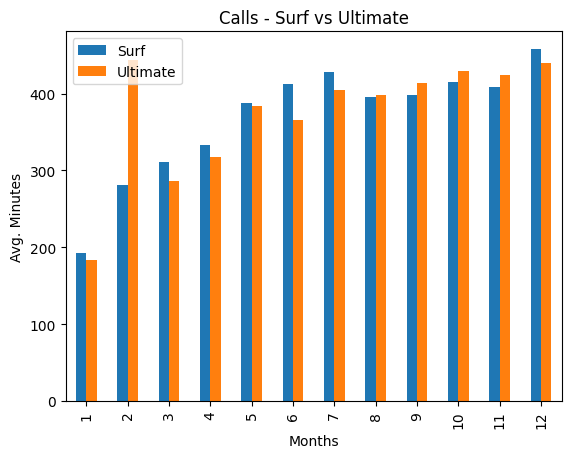

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
ml_calls_surf = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_calls_ultimate = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_calls_surf_behavior = ml_calls_surf.groupby('month')['calls_duration'].mean()
ml_calls_ultimate_behavior = ml_calls_ultimate.groupby('month')['calls_duration'].mean()

ml_calls_behavior = pd.concat([ml_calls_surf_behavior, ml_calls_ultimate_behavior], axis=1)
ml_calls_behavior.columns = ['Surf','Ultimate']

ml_calls_behavior.plot(kind = 'bar',
                    title = 'Calls - Surf vs Ultimate',
                    xlabel = 'Months',
                    ylabel = 'Avg. Minutes')
plt.show()

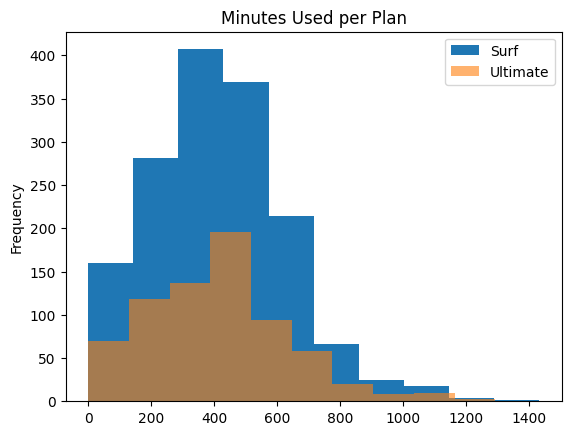

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
ml_calls_surf_minutes = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_calls_ultimate_minutes = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_calls_surf_minutes['calls_duration'].plot(kind = 'hist',
                                            title = 'Minutes Used per Plan')
ml_calls_ultimate_minutes['calls_duration'].plot(kind = 'hist',
                                                alpha = 0.6,
                                                bins = 10)
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.
ml_calls_surf_data = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_calls_ultimate_data = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_calls_surf_median = ml_calls_surf_data.groupby('month')['calls_duration'].median()
ml_calls_ultimate_median= ml_calls_ultimate_data.groupby('month')['calls_duration'].median()

ml_calls_surf_variance = ml_calls_surf_data.groupby('month')['calls_duration'].var()
ml_calls_ultimate_variance = ml_calls_ultimate_data.groupby('month')['calls_duration'].var()

print('La media de las llamadas del plan Surf es:',ml_calls_surf_median)
print('La varianza de las llamadas del plan Surf es:',ml_calls_surf_variance)
print('La media de las llamadas del plan Ultimate es:',ml_calls_ultimate_median)
print('La varianza de las llamadas del plan Ultimate es:',ml_calls_ultimate_variance)


La media de las llamadas del plan Surf es: month
1     193.0
2     241.0
3     313.0
4     320.5
5     410.0
6     408.0
7     432.0
8     373.0
9     404.0
10    411.0
11    396.0
12    430.0
Name: calls_duration, dtype: float64
La varianza de las llamadas del plan Surf es: month
1     14792.000000
2     47022.500000
3     31860.256917
4     45611.871020
5     50775.837838
6     39425.111842
7     53342.821779
8     46628.809490
9     39789.019785
10    44102.249216
11    43566.725475
12    53656.037361
Name: calls_duration, dtype: float64
La media de las llamadas del plan Ultimate es: month
1     222.0
2     444.0
3     236.5
4     284.0
5     386.0
6     378.0
7     404.0
8     389.0
9     411.0
10    432.0
11    410.5
12    422.0
Name: calls_duration, dtype: float64
La varianza de las llamadas del plan Ultimate es: month
1     15038.250000
2     48550.966667
3     54232.696970
4     31099.590476
5     39304.527094
6     33857.109091
7     64851.994155
8     47668.911871
9     51017

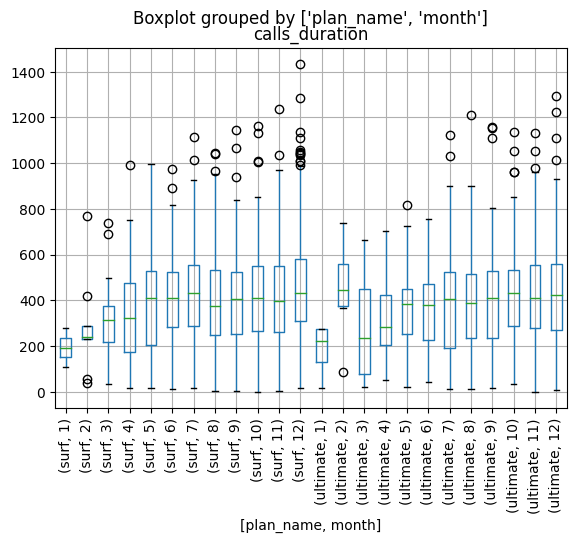

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
ml_data_calculated.boxplot(column ='calls_duration', by=['plan_name','month'])
plt.xticks(rotation=90)
plt.show()


Despues de visualizar la informacion de las llamadas podemos ver que el comportamiento de los usuarios de cada plan si es diferente entre ellos; podemos observar que los clientes que tienen el plan Surf posen mas valores atípicos que los que tienen el plan Ultimate. También podemos observar que los usuarios de Surf hacen más llamadas, por lo que podemos inferir que ellos podrian pagar más por estas llamadas hechas ya que sus minutos incluidos no son tantos como los usuarios de Ultimate. Esto ultimo es apenas una observación conforme vayamos observando los detalles de los demás rubros podemos llegar a una conclusión de cual plan genera mayor ingresos. 

### Mensajes

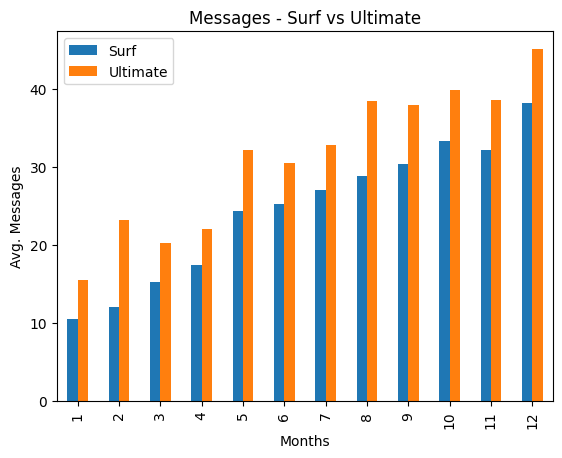

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
ml_messages_surf = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_messages_ultimate = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_messages_surf_behavior = ml_messages_surf.groupby('month')['number_of_messages'].mean()
ml_messages_ultimate_behavior = ml_messages_ultimate.groupby('month')['number_of_messages'].mean()

ml_messages_behavior = pd.concat([ml_messages_surf_behavior, ml_messages_ultimate_behavior], axis=1)
ml_messages_behavior.columns = ['Surf','Ultimate']

ml_messages_behavior.plot(kind = 'bar',
                    title = 'Messages - Surf vs Ultimate',
                    xlabel = 'Months',
                    ylabel = 'Avg. Messages')
plt.show()


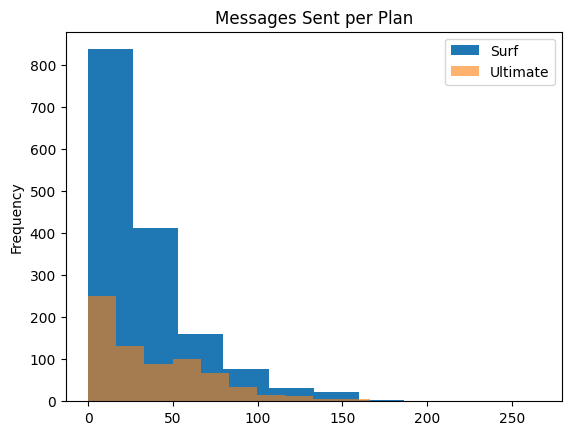

In [41]:
ml_messages_surf_number = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_messages_ultimate_number = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_messages_surf_number['number_of_messages'].plot(kind = 'hist',
                                            title = 'Messages Sent per Plan')
ml_messages_ultimate_number['number_of_messages'].plot(kind = 'hist',
                                                alpha = 0.6,
                                                bins = 10)
plt.legend(['Surf', 'Ultimate'])
plt.show()

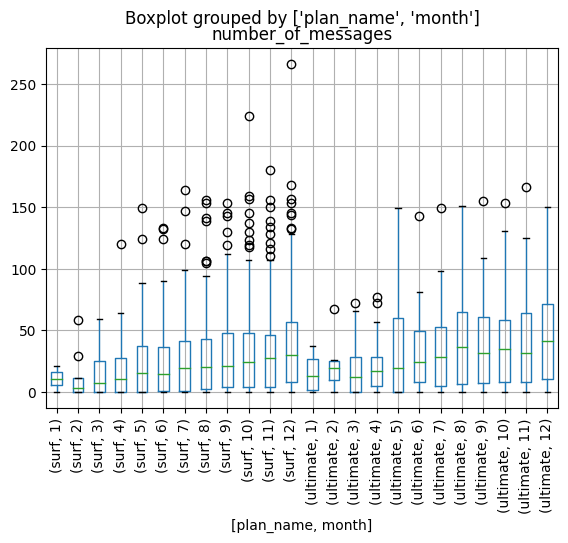

In [42]:
ml_data_calculated.boxplot(column ='number_of_messages', by=['plan_name','month'])
plt.xticks(rotation=90)
plt.show()

Como con las llamadas, el comportamiento de los mensajes es igual, observamos una mayor cantidad de valores atípicos en los usuarios de Surf que en los usuarios de Ultimate y esos datos se encuentran alejados de el consumo medio. Algo particular que podemos observar es que para los usuarios de planes Ultimate es que el valos superior de los datos de la mayoria de los meses se encuentran alejados de la media, sin considerarse tantos valores atípios.

### Internet

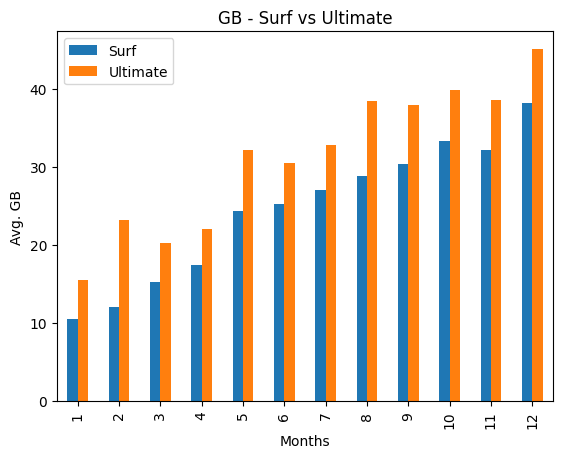

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
ml_gb_surf = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_gb_ultimate = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_gb_surf_behavior = ml_gb_surf.groupby('month')['number_of_messages'].mean()
ml_gb_ultimate_behavior = ml_gb_ultimate.groupby('month')['number_of_messages'].mean()

ml_gb_behavior = pd.concat([ml_gb_surf_behavior, ml_gb_ultimate_behavior], axis=1)
ml_gb_behavior.columns = ['Surf','Ultimate']

ml_gb_behavior.plot(kind = 'bar',
                    title = 'GB - Surf vs Ultimate',
                    xlabel = 'Months',
                    ylabel = 'Avg. GB')
plt.show()


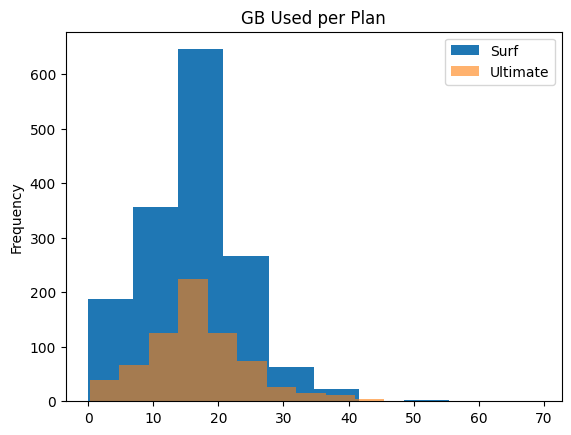

In [44]:
ml_gb_surf_used = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_gb_ultimate_used = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_gb_surf_used['gb_used'].plot(kind = 'hist',
                                            title = 'GB Used per Plan')
ml_gb_ultimate_used['gb_used'].plot(kind = 'hist',
                                    alpha = 0.6,
                                    bins = 10)
plt.legend(['Surf', 'Ultimate'])
plt.show()

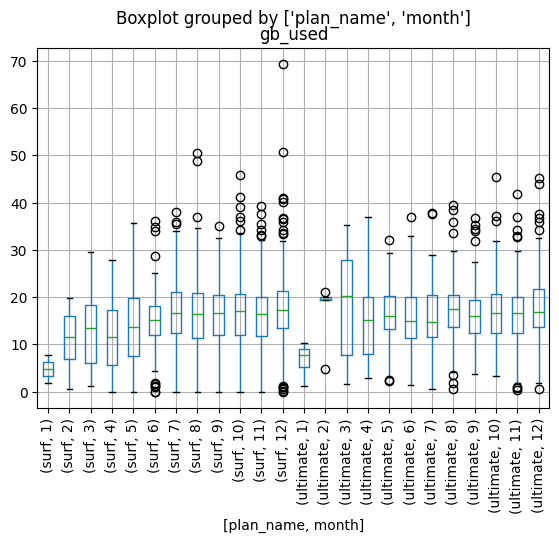

In [45]:
ml_data_calculated.boxplot(column ='gb_used', by=['plan_name','month'])
plt.xticks(rotation=90)
plt.show()

Para los datos consumidos, en el analisis podemos observar que los usuarios de ambos planes tienen valores atípicos, pero al igual que con los mensajes para el plan Surf vemos que los valores extremos de los usuarios del plan Surf están mas alejedos de los valores medios y también en uno de los meses un valor atípico se encuentra muy alejado de la media de datos consumidos.

## Ingreso

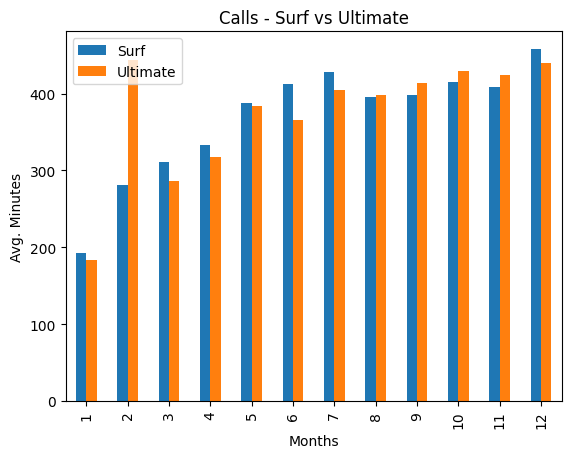

In [46]:
ml_calls_surf = ml_data_calculated[ml_data_calculated['plan_name'] == 'surf']
ml_calls_ultimate = ml_data_calculated[ml_data_calculated['plan_name'] == 'ultimate']

ml_calls_surf_behavior = ml_calls_surf.groupby('month')['calls_duration'].mean()
ml_calls_ultimate_behavior = ml_calls_ultimate.groupby('month')['calls_duration'].mean()

ml_calls_behavior = pd.concat([ml_calls_surf_behavior, ml_calls_ultimate_behavior], axis=1)
ml_calls_behavior.columns = ['Surf','Ultimate']

ml_calls_behavior.plot(kind = 'bar',
                    title = 'Calls - Surf vs Ultimate',
                    xlabel = 'Months',
                    ylabel = 'Avg. Minutes')
plt.show()

In [47]:
print("General Description:")
print(ml_data_calculated['total_revenue'].describe())

General Description:
count    2258.000000
mean       63.701891
std        45.002481
min        20.000000
25%        22.662500
50%        70.000000
75%        70.000000
max       588.660000
Name: total_revenue, dtype: float64


In [48]:
print("\nMode:", ml_data_calculated['total_revenue'].mode()[0])
print("Variance:", ml_data_calculated['total_revenue'].var())
print("Standard deviation:", ml_data_calculated['total_revenue'].std())


Mode: 70.0
Variance: 2025.2232996124055
Standard deviation: 45.002481038409485


In [49]:
print("\nDescription per plan:")
print(ml_data_calculated.groupby('plan_name')['total_revenue'].describe())

print("\nAverage per plan:")
print(ml_data_calculated.groupby('plan_name')['total_revenue'].mean())


Description per plan:
            count       mean        std   min   25%    50%   75%     max
plan_name                                                               
surf       1545.0  59.744252  53.398368  20.0  20.0  40.33  80.0  588.66
ultimate    713.0  72.277700  11.351942  70.0  70.0  70.00  70.0  182.00

Average per plan:
plan_name
surf        59.744252
ultimate    72.277700
Name: total_revenue, dtype: float64


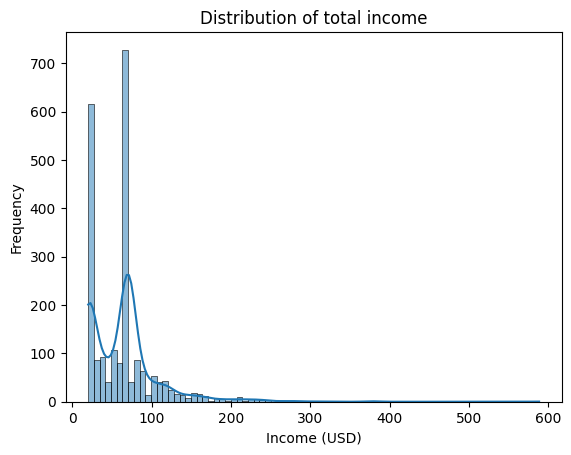

In [50]:
sns.histplot(ml_data_calculated['total_revenue'], kde=True)
plt.title('Distribution of total income')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

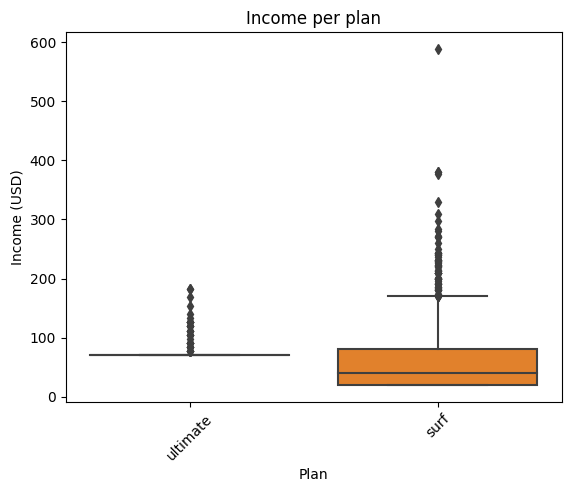

In [51]:
sns.boxplot(data=ml_data_calculated, x='plan_name', y='total_revenue')
plt.title('Income per plan')
plt.xlabel('Plan')
plt.ylabel('Income (USD)')
plt.xticks(rotation=45)
plt.show()

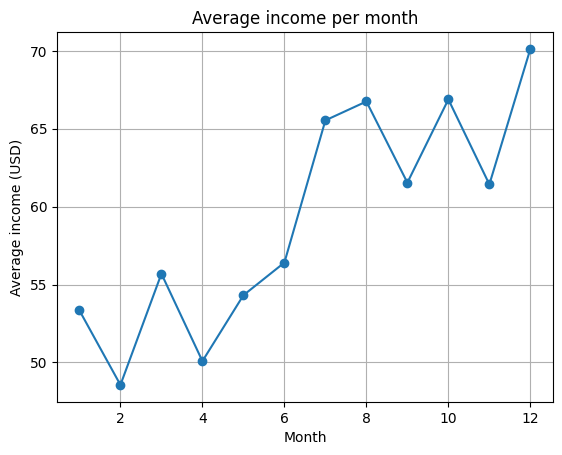

In [52]:
monthly_revenue = ml_data_calculated.groupby('month')['total_revenue'].mean()
monthly_revenue.plot(kind='line', marker='o')
plt.title('Average income per month')
plt.xlabel('Month')
plt.ylabel('Average income (USD)')
plt.grid(True)
plt.show()

Despues de analizar la información individual de los componentes de cada plan y de unirlos para poder hacer un analisis de toda la información en conjunto podemos observar varias cosas muy interesantes:

-Los usuarios de cada plan tienen comportamientos diferentes a lo largo del año. Vemos que los consumos de ambos planes se incrementan en fechas decembrinas que podemos inferir se deben a las fiestas y días feriados.

-También podemos ver que los usuarios del plan Surf tienen valores atípocos en los tres componentes del plan en comparatación del los usuarios del plan Ultimate.

-Con respecto a los ingresos generados por cada plan, vemos que el usuario del plan Surf paga en promedio 59.72 USD por mes y el del plan Ultimate paga en promedio 72.27 UDS por mes. 

-Los clientes del plan Ultimate en promedio pagan 2.27 USD por mes de más que su tarifa normal.

-Considerando que el plan Surf tiene un costo por mes de tarifa de 20 USD y el cliente en promedio paga 59.72 USD podemos considerar que este es el plan que mayor ingresos le generar a la empresa. Esto lo podemos ver analizando los cuartiles; vemos que los cuartiles 3 y 4 estan por arriba de los 40 USD. 

## Prueba las hipótesis estadísticas

In [53]:
from scipy.stats import ttest_ind

ultimate =  ml_data_calculated[( ml_data_calculated['plan_name'] == 'ultimate') & ( ml_data_calculated['total_revenue'] != 70)]['total_revenue']
surf =  ml_data_calculated[ ml_data_calculated['plan_name'] == 'surf']['total_revenue']

if len(ultimate) == 0:
    ultimate =  ml_data_calculated[ ml_data_calculated['plan_name'] == 'ultimate']['total_revenue']

t_stat, p_value = ttest_ind(ultimate, surf, equal_var=False)

print("T Statistic:", t_stat)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in income.")
else:
    print("The null hypothesis cannot be rejected: There is no evidence of a significant difference.")


T Statistic: 11.159690805703217
P Value: 8.331376116648612e-15
We reject the null hypothesis: There is a significant difference in income.


In [54]:
# Prueba las hipótesis
merged_data = ml_data_calculated.merge(ml_users[['user_id', 'city']], on='user_id', how='left')
merged_data['is_ny_nj'] = merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'

from scipy.stats import mannwhitneyu
ny_nj_income = merged_data[merged_data['is_ny_nj'] == True]['total_revenue']
other_income = merged_data[merged_data['is_ny_nj'] == False]['total_revenue']

stat, p_value = mannwhitneyu(ny_nj_income, other_income, alternative='two-sided')

print("U Statistic:", stat)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject null hypothesis: Average incomes are different between NY-NJ and other regions.")
else:
    print("We fail to reject null hypothesis: There is no evidence of a significant difference..")

U Statistic: 310385.5
P Value: 0.0004251517894423703
We reject null hypothesis: Average incomes are different between NY-NJ and other regions.


## Conclusión general

Despúes de analalizar la información proporcionada por Megaline pudimos ver el comportamiento de los clientes en cada uno de los componentes de sus planes; mensajes, llamadas y datos. Pudimos ver que en la actualidad lo que más utilizan los clientes son los datos en comparación de las llamadas y que el rubro con menor uso son los mensajes.

Al hacer el analisis pudimos ver que el plan Surf tiene mas usuarios y pagan mas por los consumos generados por el uso adicional de datos, llamadas y/o mensajes. Por esta situación podemos indicar que el plan Surf es mas rentable para Megaline que el plan Ultimate. 

Podemos inferir que los usuarios prefieren pagar 20 USD por que consideran que pagar 70 USD es mucho, pero que puede ser que no han analizado cuanto pagan por mes de lo consumido adicionalmente. Pero para poder asegurar esto, necesitariamos hacer un analisis mas amplio del comportamiento de los clientes con informacion cualitativa.